## Chekng the results using pseudo data for diferent constrains 

the constrains are 50%, 20%, 5% and 3%

In [1]:
pruebas=['FitHF_nocons/noConsSum','FitHF_50/noConsSum','FitHF_20/noConsSum','FitHF_5/noConsSum','FitHF_03/noConsSum','FitHF_1/noConsSum']
name=['HFnocons','HF50p','HF20p','HF5p','HF3p','HF1p']
name_limit=["nocons","50","20","5","03","1"]
#'HpdfFit_nocons/noConsSumSiBin','Hpdfnocons'

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

In [5]:
df = pd.DataFrame()

adding to the data frame the information of the obs and exp values of the limit

In [6]:
for j,prueba in enumerate(pruebas):
    path_limit=f'/home/marcela/Documents/mc14_lgamma/limit/factoryH/toys_2d_rot_{name_limit[j]}/'
    obs_values=[]
    exp_values=[]
    for file in range(1,51):
        try:
            with open(path_limit+f'output_{file}_300_20_resultsok.txt', 'r') as fl:
                #values=fl.read().split(',')
                values=fl.readlines()
                #print(values)
                exp_values.append(float(values[2].strip()))
                obs_values.append(float(values[-1]))
                #print(obs_values,exp_values)
        except Exception as e:
            print(e)
            obs_values.append(-100)
            exp_values.append(-100)
    df['obs_values'+name[j]] = obs_values
    df['exp_values'+name[j]] = exp_values

adding the information of the fits, the expected values of the yields of the model sS+bB, and the parameter nuisance for constrain G(sS+bB)

In [7]:
for j,prueba in enumerate(pruebas):
    path_1d=f'/home/marcela/Documents/mc14_lgamma/limit/factoryH/{prueba}'
    dimens='0Signal8Bkg_2Drot'
    fit_eq_ul='2d_rot'
    no_same=[[], [], [], []]
    nbkg_values=[]
    nsig_values=[]
    nbkg_error=[]
    nsig_error=[]
    sum_list=[]
    covals=[]
    statuses=[]
    numInvalidNll=[]
    alpha_nbkg_values=[]
    alpha_nbkg_error_values=[]
    for file in range(1,51):
        try:
            with open(path_1d+f'_results_{file}.txt', 'r') as fl:
                values=fl.readlines()
                #print(values[2])
                e=len(values)
                #print(e)
                #print(values)
                #print(values[1], "---")
                sum_list.append(float(values[1]))
                nbkg_values.append(float(values[2]))
                nbkg_error.append(float(values[3]))
                nsig_values.append(float(values[4]))
                nsig_error.append(float(values[5]))
                statuses.append(float(values[13]))
                covals.append(float(values[15]))
                numInvalidNll.append(float(values[17]))
                #print(name[j])
                if name[j] in ['HF50p','HF20p','HF5p','HF3p','HF1p']:
                    alpha_nbkg_values.append(float(values[18]))
                    alpha_nbkg_error_values.append(float(values[19]))
                else:
                    alpha_nbkg_values.append(0)
                    alpha_nbkg_error_values.append(0)
        except Exception as e:
            print(e)
    df['nbkg_values'+name[j]] = nbkg_values
    df['nsig_values'+name[j]] = nsig_values
    df['nbkg_error'+name[j]] = nbkg_error
    df['nsig_error'+name[j]] = nsig_error
    df['sum_list'+name[j]] = sum_list
    df['covals'+name[j]] = covals
    df['statuses'+name[j]] = statuses
    df['numInvalidNll'+name[j]] = numInvalidNll
    df['alpha_nbkg_values'+name[j]] = alpha_nbkg_values
    df['alpha_nbkg_error_values'+name[j]] = alpha_nbkg_error_values
    #dic_tests[name[j]] = df

In [8]:
df.describe()

,obs_valuesHFnocons,exp_valuesHFnocons,obs_valuesHF50p,exp_valuesHF50p,obs_valuesHF20p,exp_valuesHF20p,obs_valuesHF5p,exp_valuesHF5p,obs_valuesHF3p,exp_valuesHF3p,...,nbkg_valuesHF1p,nsig_valuesHF1p,nbkg_errorHF1p,nsig_errorHF1p,sum_listHF1p,covalsHF1p,statusesHF1p,numInvalidNllHF1p,alpha_nbkg_valuesHF1p,alpha_nbkg_error_valuesHF1p
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,50.0,50.000000,50.000000,50.0,50.0,50.000000,5.000000e+01,50.000000
mean,6.186521,5.271621,5.754603,5.446421,5.578018,5.369836,5.118121,5.040264,5.203023,5.011898,...,21.0,-0.964173,0.0,2.259897,20.035827,3.0,0.0,0.580000,8.180169e-03,0.992542
std,2.295330,0.279854,2.389434,0.217425,1.844654,0.217393,1.877595,0.324793,1.760173,0.291519,...,0.0,3.828892,0.0,0.486110,3.828892,0.0,0.0,1.472053,3.712680e-02,0.000231
min,1.934210,4.583150,1.460526,4.736843,3.128376,4.701083,1.894737,4.466922,1.973684,4.521203,...,21.0,-14.482112,0.0,1.228522,6.517888,3.0,0.0,0.000000,-4.882011e-02,0.991943
25%,4.805128,5.108134,4.781692,5.344980,4.342281,5.248075,3.785771,4.742482,3.878955,4.749959,...,21.0,-2.025230,0.0,1.912675,18.974770,3.0,0.0,0.000000,-9.504649e-03,0.992393
50%,5.891523,5.316973,5.514209,5.469842,5.388851,5.369779,4.867203,5.031950,4.946831,4.997808,...,21.0,-0.008593,0.0,2.211388,20.991407,3.0,0.0,0.000000,1.391118e-10,0.992559
75%,6.673041,5.454661,6.618581,5.567521,6.001746,5.552727,5.979584,5.180925,5.949124,5.183907,...,21.0,0.818705,0.0,2.555001,21.818705,3.0,0.0,0.000000,1.636139e-02,0.992699
max,14.190783,5.757530,13.024704,5.876879,11.395130,5.693056,11.084723,5.856396,10.171974,5.764099,...,21.0,4.903760,0.0,3.281800,25.903760,3.0,0.0,8.000000,1.441948e-01,0.993050


In [ ]:
#lista_vars=[]
#for a in name:
#    lista_vars +=['sum_list'+ a,'statuses'+a,'numInvalidNll'+a]

quick look: how many events have statuses !=0 and numInvalidNll !=0

In [10]:
for j,e in enumerate(pruebas):
    a=name[j]
    print('lenstatus',a,len(df.query(f'statuses{a} !=0')))
    print('leninv', a,len(df.query(f'numInvalidNll{a} !=0')))
    #vars_lista=['sum_list'+ a,'nsig_values'+a,'nsig_error'+a,'nbkg_values'+a,'nbkg_error'+a,'statuses'+a,'numInvalidNll'+a, ]

lenstatus HFnocons 0
leninv HFnocons 11
lenstatus HF50p 0
leninv HF50p 11
lenstatus HF20p 0
leninv HF20p 11
lenstatus HF5p 0
leninv HF5p 11
lenstatus HF3p 0
leninv HF3p 11
lenstatus HF1p 0
leninv HF1p 11


In [11]:
df.filter(regex='nsig').describe()

,nsig_valuesHFnocons,nsig_errorHFnocons,nsig_valuesHF50p,nsig_errorHF50p,nsig_valuesHF20p,nsig_errorHF20p,nsig_valuesHF5p,nsig_errorHF5p,nsig_valuesHF3p,nsig_errorHF3p,nsig_valuesHF1p,nsig_errorHF1p
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-2.787070,2.886341,-2.515012,2.940366,-1.457624,2.568624,-0.998191,2.285609,-0.975511,2.268856,-0.964173,2.259897
std,10.658054,0.791278,9.937604,1.327493,5.641245,0.704477,3.944493,0.485009,3.868550,0.485592,3.828892,0.486110
min,-49.999998,1.359006,-49.999997,1.330858,-25.309875,1.276653,-15.120990,1.230809,-14.697540,1.229021,-14.482112,1.228522
25%,-2.962315,2.344734,-2.722811,2.277404,-2.336234,2.188280,-2.048942,1.951549,-2.031915,1.923930,-2.025230,1.912675
50%,-0.013195,2.795035,-0.010327,2.717750,-0.006520,2.457637,-0.004570,2.221252,-0.008593,2.214387,-0.008593,2.211388
75%,1.076315,3.403632,1.001278,3.183827,0.885241,2.902916,0.821967,2.583324,0.817827,2.565637,0.818705,2.555001
max,7.305281,5.859980,6.892391,9.519608,5.734823,5.412462,4.971222,3.302692,4.926092,3.288650,4.903760,3.281800


In [12]:
df.filter(regex='obs').describe()

,obs_valuesHFnocons,obs_valuesHF50p,obs_valuesHF20p,obs_valuesHF5p,obs_valuesHF3p,obs_valuesHF1p
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.186521,5.754603,5.578018,5.118121,5.203023,5.118217
std,2.295330,2.389434,1.844654,1.877595,1.760173,1.848565
min,1.934210,1.460526,3.128376,1.894737,1.973684,1.736843
25%,4.805128,4.781692,4.342281,3.785771,3.878955,3.883567
50%,5.891523,5.514209,5.388851,4.867203,4.946831,4.656604
75%,6.673041,6.618581,6.001746,5.979584,5.949124,6.172068
max,14.190783,13.024704,11.395130,11.084723,10.171974,10.514958


### The following plots has the distribution of the yiels and the errors of the parameters of the model

HFnocons


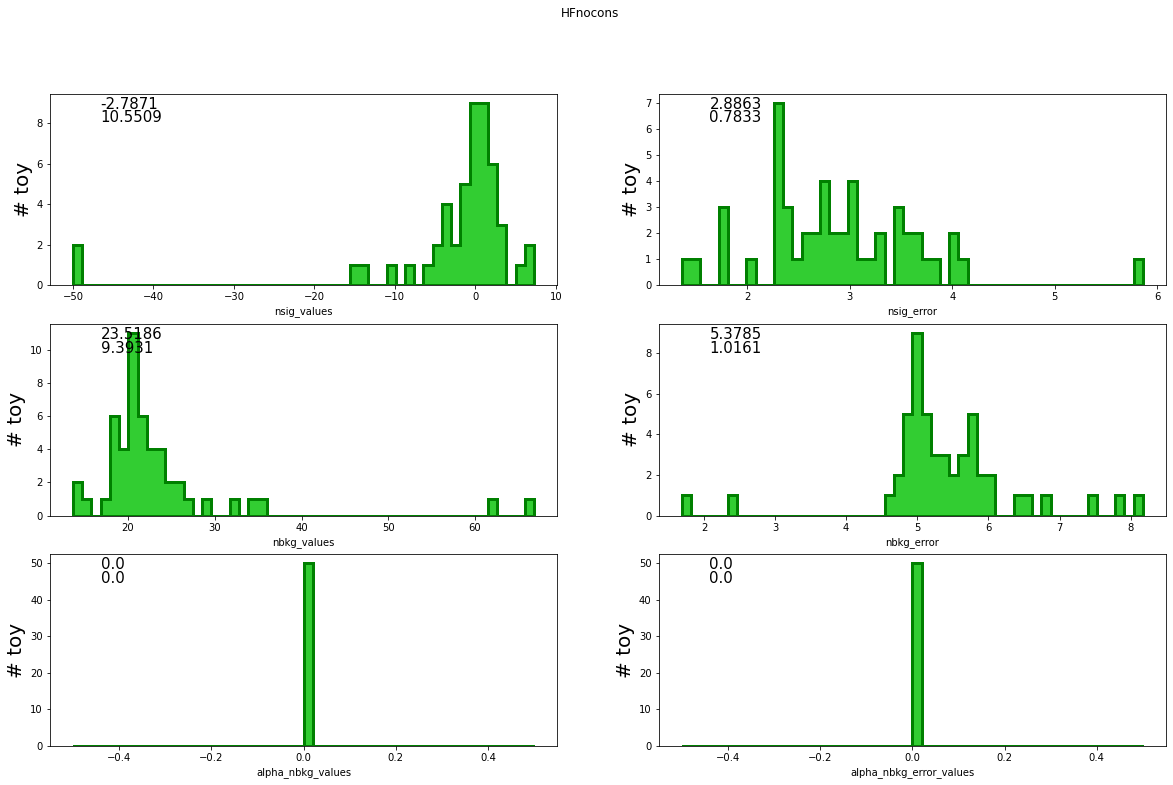

HF50p


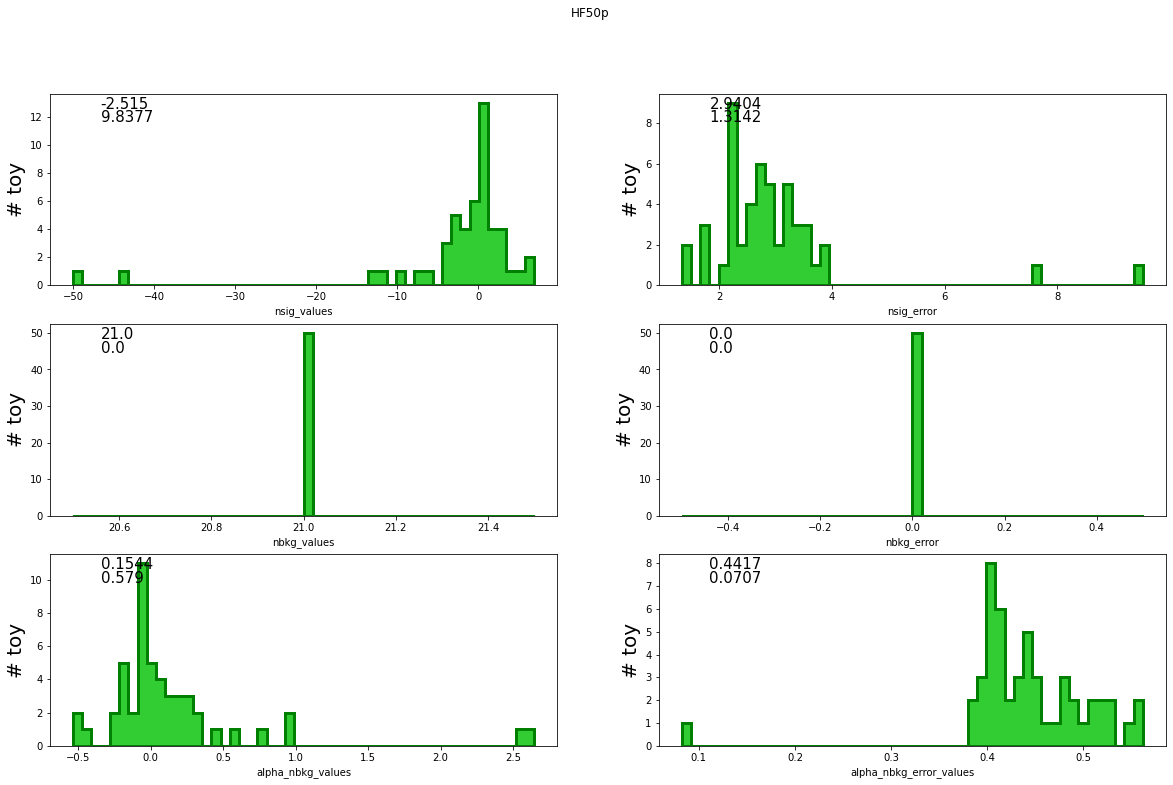

HF20p


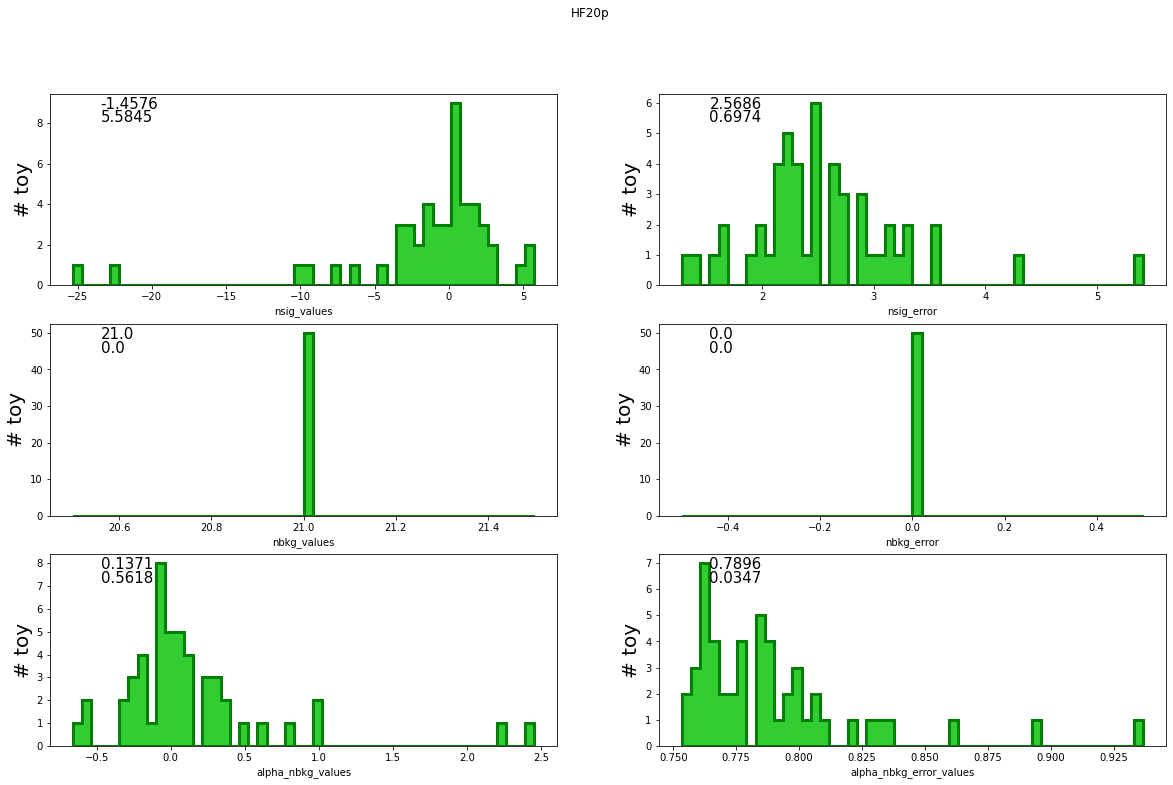

HF5p


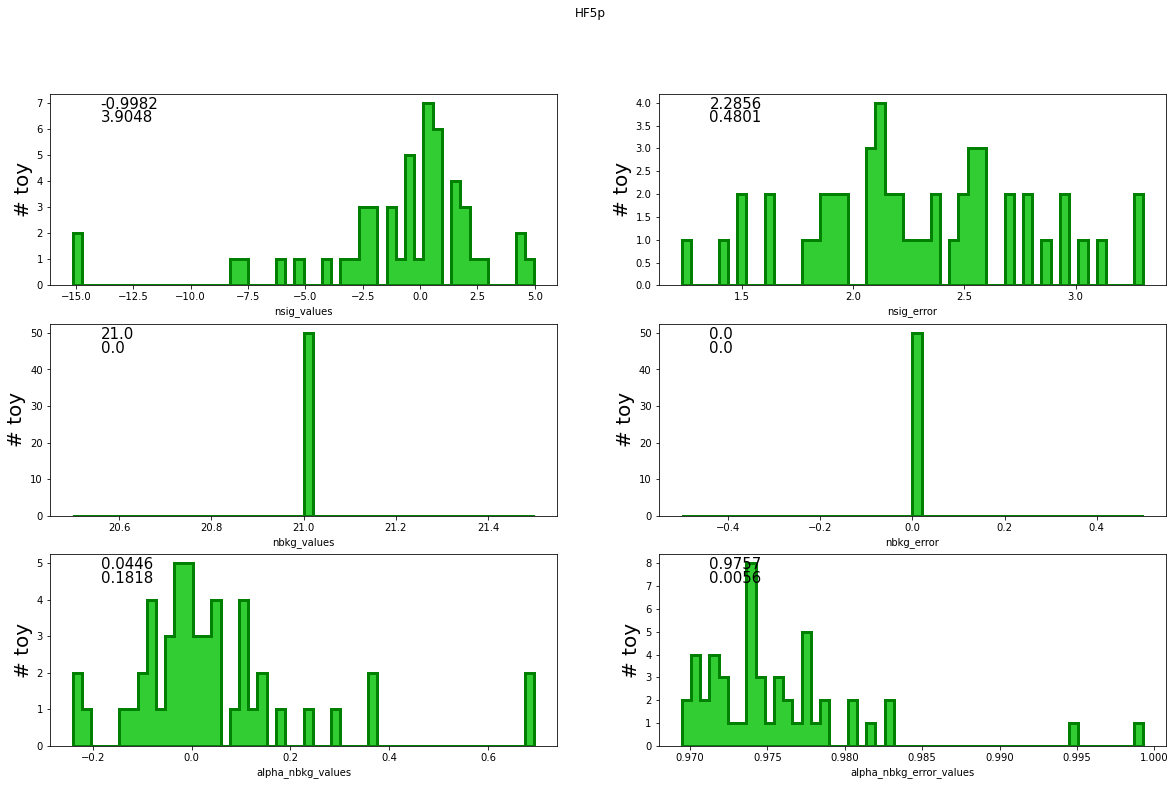

HF3p


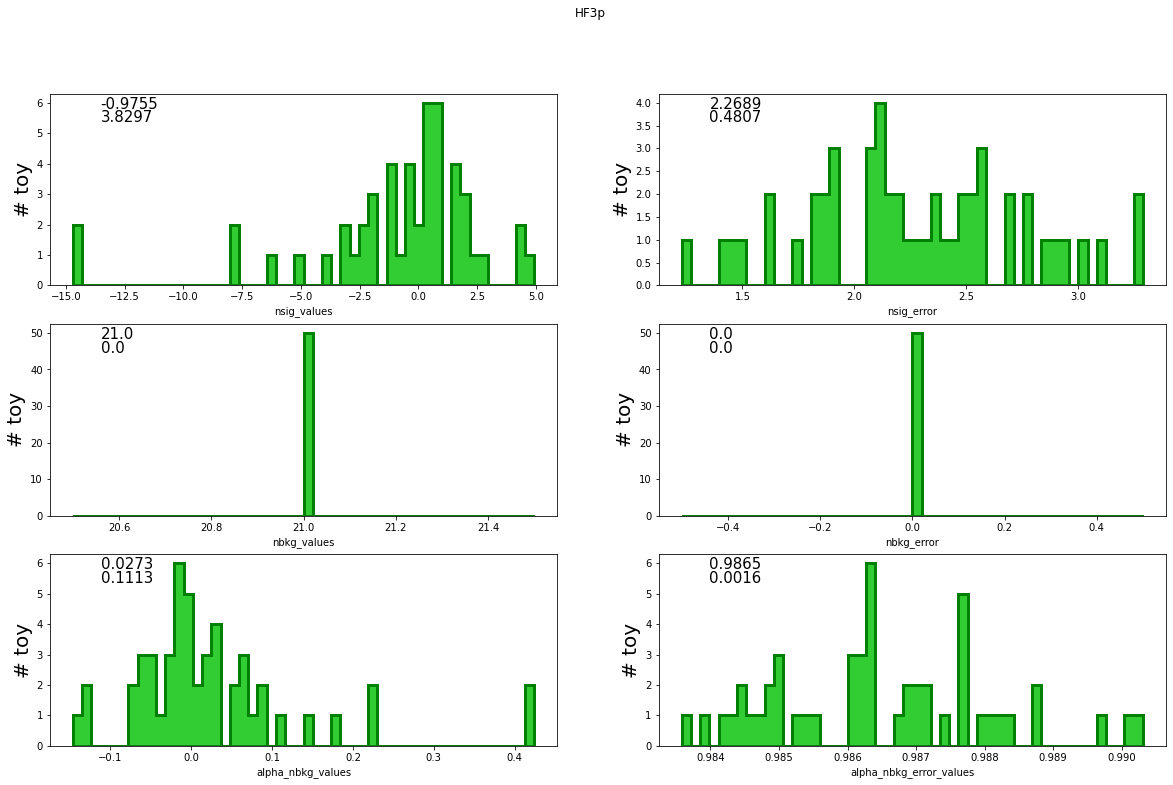

HF1p


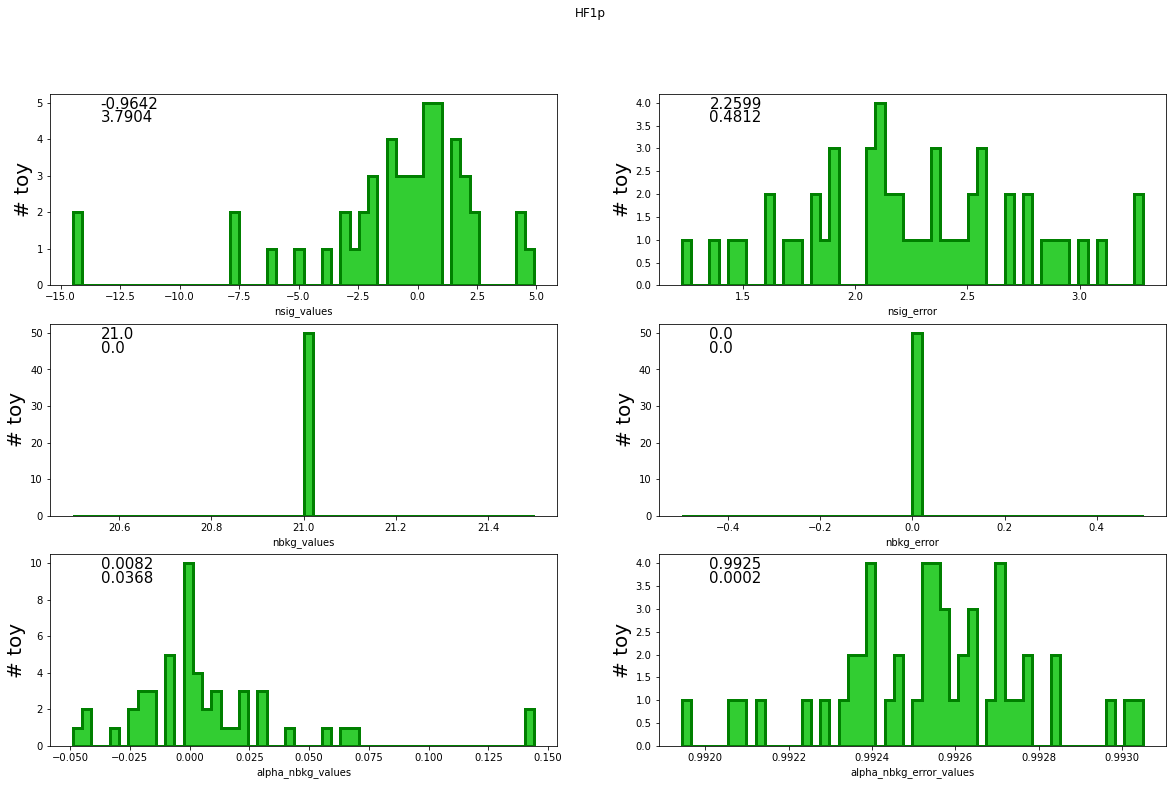

In [13]:
for j,prueba in enumerate(pruebas):
    print(name[j])
    fig, axis = plt.subplots(3, 2, figsize=(20,12))
    axis = axis.flatten()
    fig.suptitle(name[j])
    for ax, key in zip(axis,['nsig_values','nsig_error','nbkg_values','nbkg_error','alpha_nbkg_values','alpha_nbkg_error_values']):
        ax.hist(df[key+name[j]], range=[np.min(df[key+name[j]]),np.max(df[key+name[j]])],bins=50, alpha=1.0, histtype='stepfilled', linewidth=3, edgecolor='green', facecolor='limegreen')
        ax.text(0.1,0.92,round(np.mean(df[key+name[j]]),4), transform=ax.transAxes, fontsize=15)
        ax.text(0.1,0.85,round(np.std(df[key+name[j]]),4),transform=ax.transAxes, fontsize=15)
        ax.set_ylabel('# toy', fontsize=20)
        ax.set_xlabel(key, fontsize=10)
    plt.show()

quick look: exp and obs values and its limits

In [14]:
for j,e in enumerate(pruebas):
    a=name[j]
    print(a)
    print('range_df',len(df[f'obs_values{a}']))
    print('obs',j,np.mean(df[f'obs_values{a}']))
    print('min max',j,np.min(df[f'obs_values{a}']),np.max(df[f'obs_values{a}']))
    print('exp', j,np.mean(df[f'exp_values{a}']))
    print('min max',j,np.min(df[f'exp_values{a}']),np.max(df[f'exp_values{a}']))


HFnocons
range_df 50
obs 0 6.186521482959205
min max 0 1.9342099366902727 14.190783084898143
exp 0 5.271621477269711
min max 0 4.5831501335264235 5.757530460656547
HF50p
range_df 50
obs 1 5.754602999764151
min max 1 1.460525968363299 13.02470414169691
exp 1 5.4464212352141885
min max 1 4.736843307815709 5.876878753801641
HF20p
range_df 50
obs 2 5.578018453880118
min max 2 3.128375828319982 11.395129938454982
exp 2 5.369836227084868
min max 2 4.701082603206542 5.693055509044508
HF5p
range_df 50
obs 3 5.118121070520304
min max 3 1.8947368797668542 11.084723369464458
exp 3 5.04026417890044
min max 3 4.466922238651016 5.856395554955434
HF3p
range_df 50
obs 4 5.203022758888062
min max 4 1.9736842105263157 10.17197381923605
exp 4 5.011897598478558
min max 4 4.521202990976777 5.764098949757319
HF1p
range_df 50
obs 5 5.118217062978982
min max 5 1.7368426531609091 10.514957796069503
exp 5 4.740896185245194
min max 5 4.4557540804429845 5.37120565907378


### The following plots has the distribution of the exp and obs values of the UL

obs_valuesHFnocons
exp_valuesHFnocons


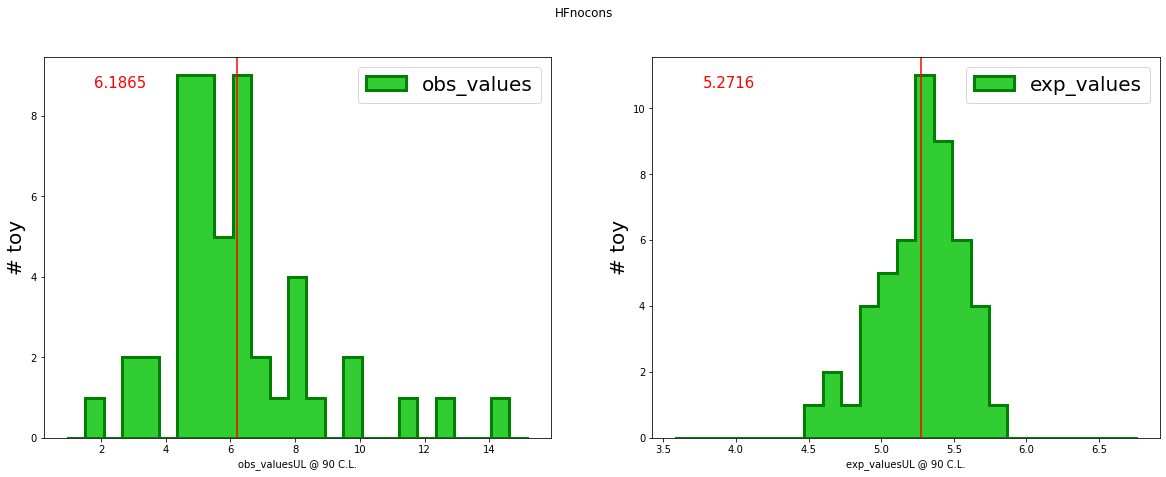

obs_valuesHF50p
exp_valuesHF50p


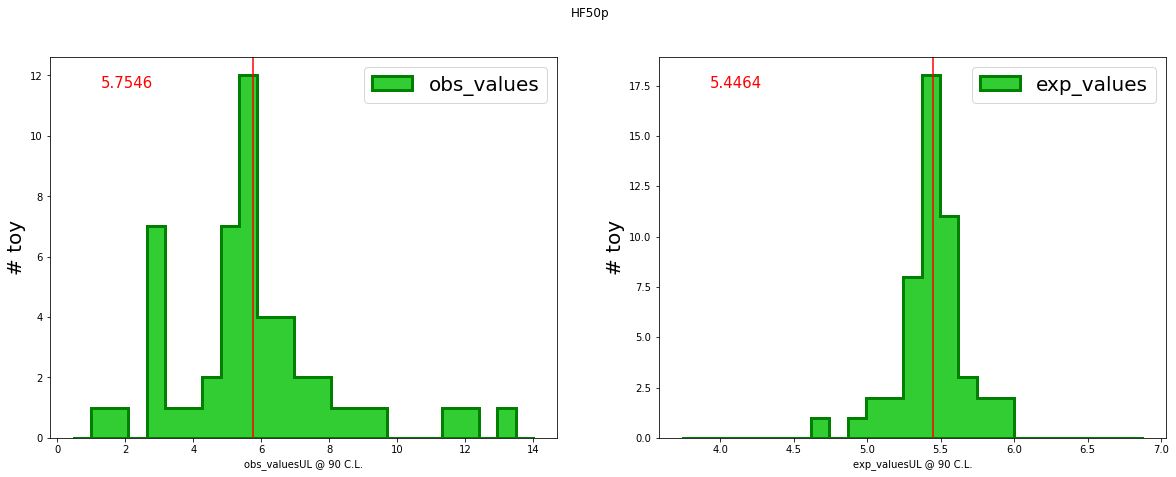

obs_valuesHF20p
exp_valuesHF20p


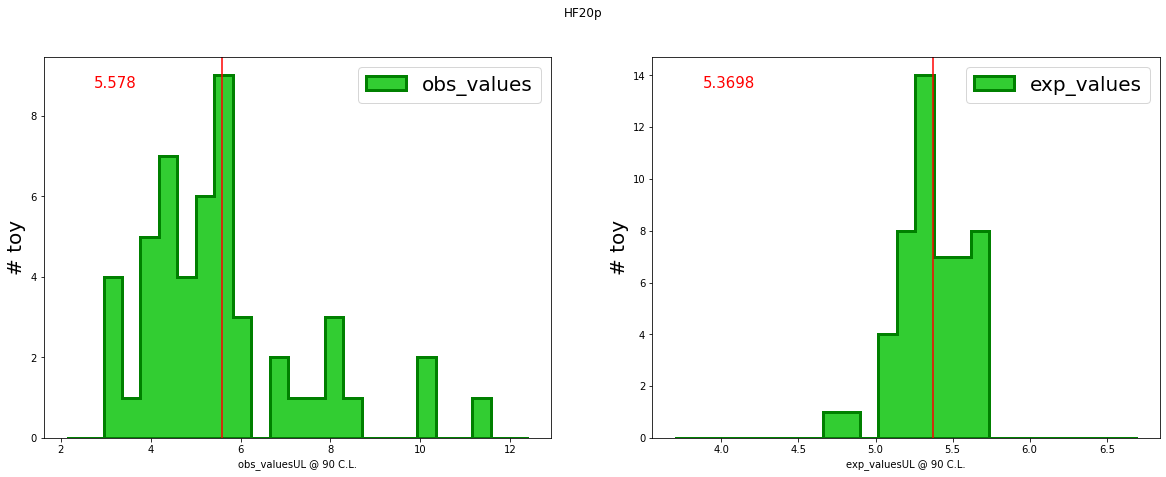

obs_valuesHF5p
exp_valuesHF5p


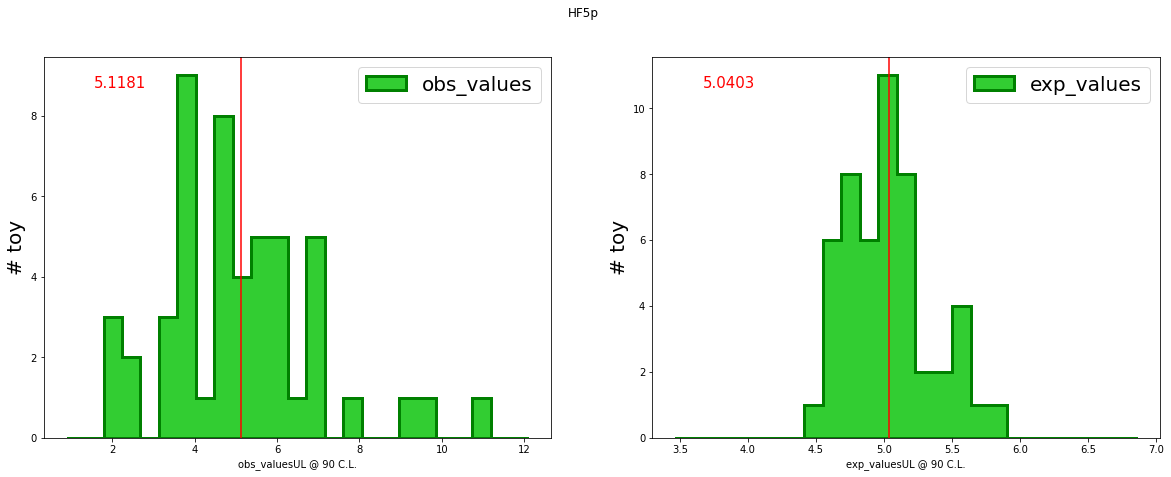

obs_valuesHF3p
exp_valuesHF3p


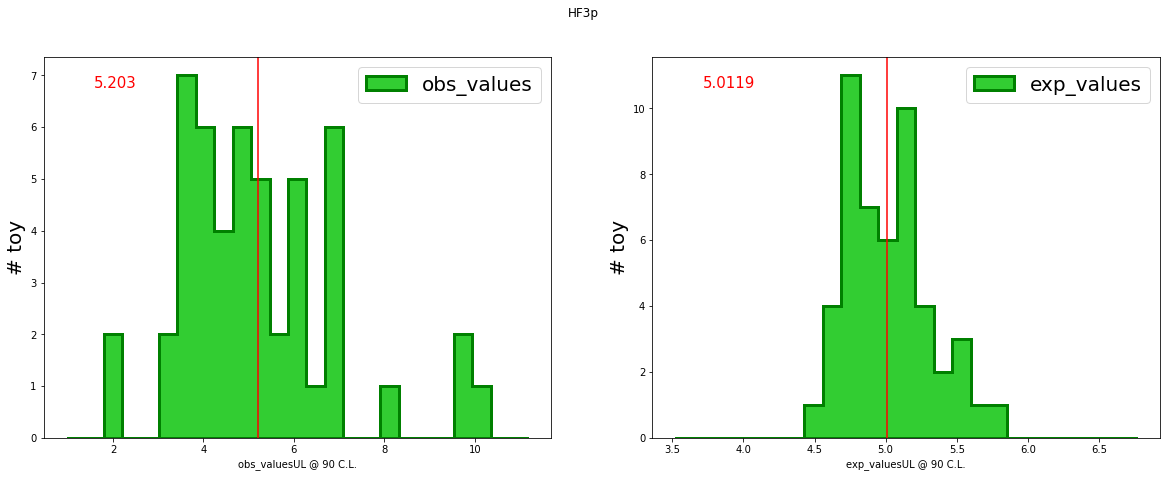

obs_valuesHF1p
exp_valuesHF1p


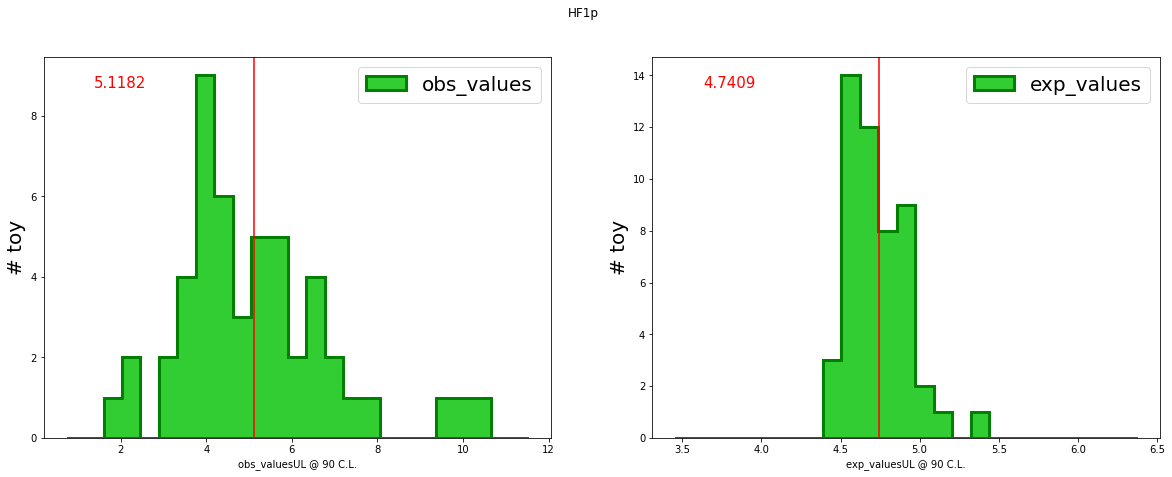

In [15]:
for j,prueba in enumerate(pruebas):
    a=name[j]
    fig, axis = plt.subplots(1, 2, figsize=(20,7))
    axis = axis.flatten()
    fig.suptitle(a)
    for ax, key in zip(axis,['obs_values','exp_values']):
        exp_ranges=[np.min(df[key+a]-1),np.max(df[key+a])+1]
        ax.hist(df[key+a], range=exp_ranges,bins=25, label=key, alpha=1.0, histtype='stepfilled', linewidth=3, edgecolor='green', facecolor='limegreen')
        print(key+a)
        ax.axvline(np.mean(df[key+a]),0,20, color='r')
        ax.text(0.1,0.92,round(np.mean(df[key+a]),4), transform=ax.transAxes, fontsize=15, color='red')
        ax.set_ylabel('# toy', fontsize=20)
        ax.set_xlabel(key + 'UL @ 90 C.L.', fontsize=10)
        ax.legend(loc="upper right", fontsize=20)
    plt.show()